# Diurnal Histogram

In [1]:
import pandas as pd
import glob

In [3]:
#load wrf-bcc dataframes
df_HIST = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/HIST_UVV_[21]*_*')), ignore_index=True)
df_8p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC8p5_UVV*')), ignore_index=True)
df_4p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC4p5_UVV*')), ignore_index=True)
df_8p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC8p5_UVV*')), ignore_index=True)
df_4p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC4p5_UVV*')), ignore_index=True)

#iterate through the epochs and threshold each based on UVV value
epochs = ['HIST', '4p5MID', '8p5MID', '4p5END', '8p5END']

for epoch in epochs:
    locals()[f'df_{epoch}'] = locals()[f'df_{epoch}'][((locals()[f'df_{epoch}']['DBZ'] >= 40.0) & (locals()[f'df_{epoch}']['UVV'] >= 25.0))]
    locals()[f'df_{epoch}']['Time'] = pd.to_datetime( locals()[f'df_{epoch}']['Time'])
    locals()[f'df_{epoch}']['Month'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.month
    locals()[f'df_{epoch}']['Hour'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.hour
    

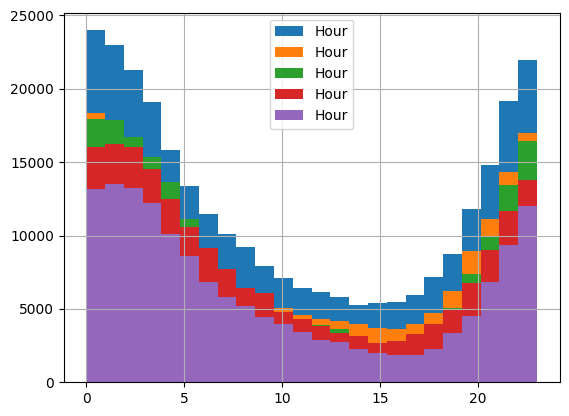

In [8]:
epochs = ['8p5END', '4p5END', '8p5MID', '4p5MID', 'HIST']

for epoch in epochs:
    locals()[f'df_{epoch}']['Hour'].hist(bins=24, legend=True)

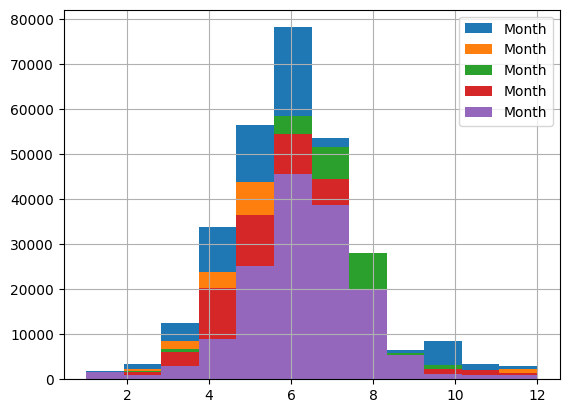

In [9]:
epochs = ['8p5END', '4p5END', '8p5MID', '4p5MID', 'HIST']

for epoch in epochs:
    locals()[f'df_{epoch}']['Month'].hist(bins=12, legend=True)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

In [2]:
#load wrf-bcc dataframes
df_HIST = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/HIST_UVV_[21]*_*')), ignore_index=True)
df_8p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC8p5_UVV*')), ignore_index=True)
df_4p5END = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/EOC4p5_UVV*')), ignore_index=True)
df_8p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC8p5_UVV*')), ignore_index=True)
df_4p5MID = pd.concat(map(pd.read_csv, glob.glob('/home/scratch/jcorner1/syn_sev/dataframes/MC4p5_UVV*')), ignore_index=True)

In [6]:
#iterate through the epochs
epochs = ['HIST', '4p5MID', '8p5MID', '4p5END', '8p5END']
epoch_labels = ['HIST', 'MID4.5', 'MID8.5', 'END4.5', 'END8.5']


for epoch in epochs:
    
    #load wrf-bcc dataframes and append appropiate information to dataframe.
    print(epoch)
    locals()[f'df_{epoch}'] = locals()[f'df_{epoch}'][((locals()[f'df_{epoch}']['DBZ'] >= 40.0) & (locals()[f'df_{epoch}']['UVV'] >= 25.0))]
    locals()[f'df_{epoch}']['Time'] = pd.to_datetime( locals()[f'df_{epoch}']['Time'])
    locals()[f'df_{epoch}']['Month'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.month
    locals()[f'df_{epoch}']['Year'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.year
    locals()[f'df_{epoch}']['Day'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.day
    locals()[f'df_{epoch}']['Hour'] = pd.to_datetime( locals()[f'df_{epoch}']['Time']).dt.hour
    locals()[f'df_{epoch}']['New_Hour'] = pd.to_datetime((locals()[f'df_{epoch}']['Time']) + pd.DateOffset(hours=12)).dt.hour

HIST
4p5MID
8p5MID
4p5END
8p5END


/tmp/ipykernel_65463/1602245708.py:24: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(colors, labels=epoch_labels, fontsize=25)


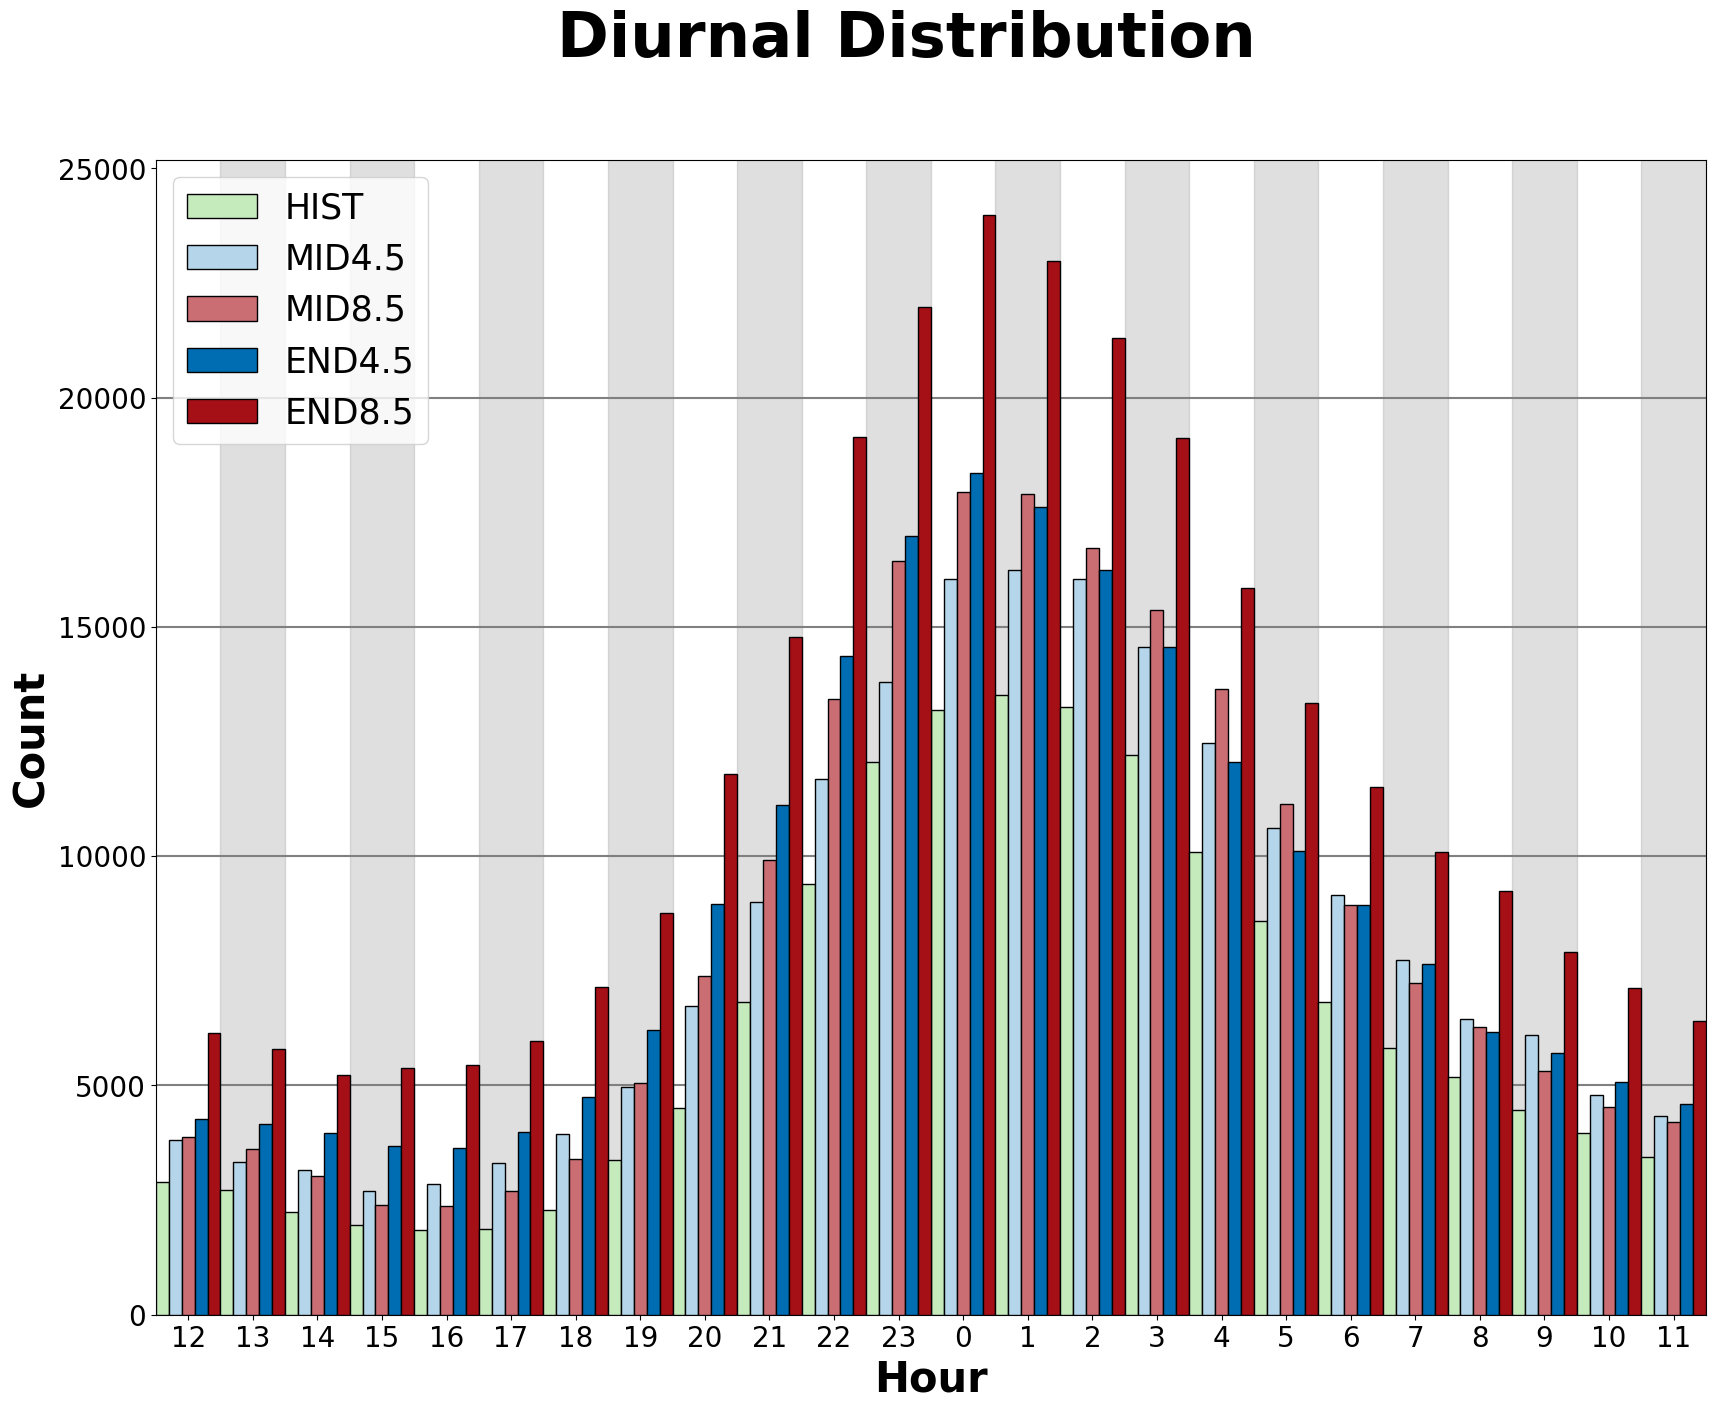

In [12]:
fig = plt.figure(figsize=(20,15))

#All modes, regions, and seasons Diurnal Bar Graph
colors = ['#c5eabc', '#b5d6ea', '#ca6e74', '#006db3', '#a51017']
pos = [-0.4, -0.2, 0, 0.2, 0.4]

plt.suptitle('Diurnal Distribution', size=45).set_weight('bold')

for hour in np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]):
    values = {}
    
    for epoch in range(len(epochs)):
        sub_df = locals()[f'df_{epochs[epoch]}']
        sub_df = sub_df[(sub_df['New_Hour'] == hour)].copy()
        plt.bar(hour + pos[epoch], len(sub_df), color=colors[epoch], edgecolor='k', width=0.20, zorder=10)
        

plt.xticks(np.arange(0,24,1), np.concatenate([np.arange(12,24,1),np.arange(0,12,1)]), fontsize=20)
plt.xlabel('Hour', fontsize=30).set_weight('bold')
plt.yticks(np.arange(0,25001,5000), fontsize=20)
plt.ylabel('Count', fontsize=30).set_weight('bold')
plt.xlim(-0.5, 23.5)

plt.legend(colors, labels=epoch_labels, fontsize=25)

plt.axhline(y = 5000, color = 'grey', ls='-')
plt.axhline(y = 10000, color = 'grey', ls='-')
plt.axhline(y = 15000, color = 'grey', ls='-')
plt.axhline(y = 20000, color = 'grey', ls='-')

plt.axvspan(0.5, 1.5, color='grey', alpha=0.25)
plt.axvspan(2.5, 3.5, color='grey', alpha=0.25)
plt.axvspan(4.5, 5.5, color='grey', alpha=0.25)
plt.axvspan(6.5, 7.5, color='grey', alpha=0.25)
plt.axvspan(8.5, 9.5, color='grey', alpha=0.25)
plt.axvspan(10.5, 11.5, color='grey', alpha=0.25)
plt.axvspan(12.5, 13.5, color='grey', alpha=0.25)
plt.axvspan(14.5, 15.5, color='grey', alpha=0.25)
plt.axvspan(16.5, 17.5, color='grey', alpha=0.25)
plt.axvspan(18.5, 19.5, color='grey', alpha=0.25)
plt.axvspan(20.5, 21.5, color='grey', alpha=0.25)
plt.axvspan(22.5, 23.5, color='grey', alpha=0.25)

plt.savefig('../Plots/diurnal_all_storms.png', format='png', dpi=500, bbox_inches='tight')